In [808]:
import numpy as np
import pandas as pd
import os
import joblib
import math
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)

In [809]:
SIMULATION_TIME = float(input('Please!!!!! Enter simulation time'))
print(f'It was simulated for {SIMULATION_TIME} seconds right?')

It was simulated for 3.0 seconds right?


In [810]:
sequence = []
template = {
     8 : 'FDIA Cyber attack',
     # 5 : 'Imbalance',
}

In [811]:
def report_time_stamps(s_time, e_time):
    s_slice = s_time * 2000
    e_slice = e_time * 2000
    samples = (e_slice - s_slice) / 1000
    return math.ceil(samples), math.ceil(s_slice), math.ceil(e_slice), 

In [812]:
msg = """What event did you simulate
                      FDIA Cyber attack press 8\n
                
                      """
while True:
    event = int(input(msg))
    if event == 9:
        break
    if event not in template.keys():
        raise Exception("Please choose the right events here!")
    start_time = float(input(f"what is {template[event]}'s start time:"))
    end_time = float(input(f"what is {template[event]}'s end time:"))
    if SIMULATION_TIME < start_time or SIMULATION_TIME < end_time:
        raise Exception("Simulation time is shorter")
    if start_time > end_time:
        raise Exception("Check code, start time is greater than end time")
    sequence.append([event, (start_time, end_time)])
print(sequence)

[[8, (2.0, 2.5)]]


In [813]:
def calc_examples(time):
    return math.ceil(time/0.5)

examples = calc_examples(SIMULATION_TIME)
print(f'Your simulation has {examples} examples')

Your simulation has 6 examples


In [814]:
if 'fdia.joblib' in os.listdir():
    labels_np = joblib.load('fdia.joblib')
else:
    print('Just starting your labels ooooh!')
    labels_np = np.empty(shape=(0, 1))


READ IN P

In [815]:
P_df = pd.read_excel('P.xlsx', names=['P1', 'P2', 'P3'])

In [816]:
P_df.head(3)

,P1,P2,P3
0,0.000000,0.000000,0.000000
1,3.054839,3.211059,3.615530
2,67.369655,70.320871,76.559323


READ IN Q

In [817]:
Q_df = pd.read_excel('Q.xlsx', names=['Q1', 'Q2', 'Q3'])

In [818]:
Q_df.head(3)

,Q1,Q2,Q3
0,0.000000,0.000000,0.000000
1,0.066910,0.071341,0.079563
2,1.631074,1.164241,0.630967


READ IN V

In [819]:
V_df = pd.read_excel('V.xlsx', names=['V1', 'V2', 'V3'])

In [820]:
V_df.head(3)

,V1,V2,V3
0,311.126984,311.126984,311.126984
1,311.126783,311.126770,311.126745
2,311.122090,311.123491,311.125091


READ IN F

In [821]:
F_df = pd.read_excel('F.xlsx', names=['F1', 'F2', 'F3'])

In [822]:
F_df.head(3)

,F1,F2,F3
0,50.000000,50.000000,50.000000
1,49.999976,49.999974,49.999971
2,49.999464,49.999440,49.999391


CONCATENATE ALONG COLUMNS

In [823]:
experiment_df = pd.concat((P_df, Q_df, V_df, F_df), axis=1)

In [824]:
experiment_df = experiment_df.drop(0,).reset_index().iloc[::, 1::]
experiment_df

,P1,P2,P3,Q1,Q2,Q3,V1,V2,V3,F1,F2,F3
0,3.054839,3.211059,3.615530,0.066910,0.071341,0.079563,311.126783,311.126770,311.126745,49.999976,49.999974,49.999971
1,67.369655,70.320871,76.559323,1.631074,1.164241,0.630967,311.122090,311.123491,311.125091,49.999464,49.999440,49.999391
2,152.733406,164.460714,192.424610,6.254462,5.688765,6.447526,311.108220,311.109917,311.107641,49.998785,49.998691,49.998469
3,202.836534,222.367922,271.339707,10.453545,10.583265,12.103388,311.095623,311.095234,311.090674,49.998386,49.998230,49.997841
4,244.556013,272.104735,347.780125,13.658906,15.144052,18.316593,311.086007,311.081552,311.072034,49.998054,49.997835,49.997232
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-47737.064043,-9503.631335,102724.483793,11145.606890,4086.578906,15368.605617,277.690163,298.867247,265.021167,50.379879,50.075627,49.182545
5996,-47673.378368,-9482.977070,102636.752617,10983.355756,3964.013781,15515.959141,278.176916,299.234942,264.579106,50.379373,50.075463,49.183243
5997,-47599.891587,-9453.587347,102400.679515,10810.926656,3820.913171,15738.875684,278.694204,299.664244,263.910357,50.378788,50.075229,49.185121
5998,-47508.648367,-9401.799519,102143.474101,10668.306844,3734.478990,15901.123646,279.122063,299.923547,263.423613,50.378062,50.074817,49.187168


In [825]:
for (i, (event, (start_time, end_time))) in enumerate(sequence):
    samples, start_slice, end_slice = report_time_stamps(start_time, end_time)
    event_np_arr = np.array([[event] for i in range(samples)])
    labels_np = np.append(labels_np, event_np_arr, axis=0)
    if i == 0:
        building_block = experiment_df.iloc[start_slice:end_slice, ::]
    else:
        new_block = experiment_df.iloc[start_slice:end_slice, ::]
        building_block = pd.concat((building_block, new_block), ignore_index=True)

In [826]:
f'shape of labels is {labels_np.shape}', f'Dimension of labels is {labels_np.ndim}'

('shape of labels is (191, 1)', 'Dimension of labels is 2')

In [827]:
f'shape of dataframe is {building_block.shape}'

'shape of dataframe is (1000, 12)'

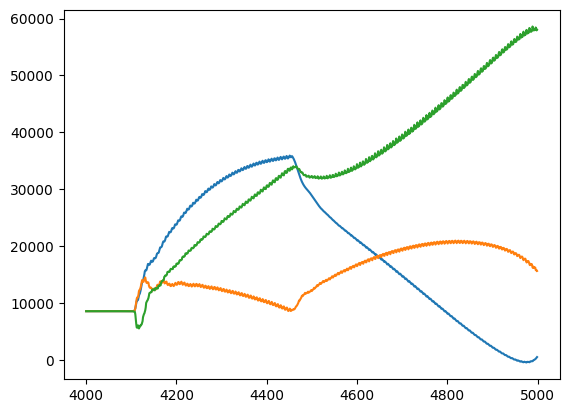

In [828]:
plt.plot(building_block.iloc[::, 0:3])

# WRITING TO JOBLIB FILES

In [829]:
np.unique(labels_np, return_counts=True)

(array([8]), array([191], dtype=int64))

In [830]:
joblib.dump(labels_np, 'fdia.joblib')
    

['fdia.joblib']

In [831]:
if 'fdia_df.joblib' in os.listdir():
    fdia_df_old = joblib.load('fdia_df.joblib')
    fdia_df = pd.concat((fdia_df_old, building_block), axis=0, ignore_index=True)
    joblib.dump(fdia_df, 'fdia_df.joblib')
else:
    print('Organising the DataFrame for the first time!')
    joblib.dump(building_block, 'fdia_df.joblib')
    

# CONFIRM JOBLIB FILES

In [832]:
predictors = joblib.load('fdia_df.joblib')
targets = joblib.load('fdia.joblib')

In [833]:
predictors.shape, targets.shape

((191000, 12), (191, 1))

In [834]:
print(f'fdia attack has a total of  {np.unique(targets, return_counts=True)[1][0]} examples')
# print(f'Imbalance total of {np.unique(targets, return_counts=True)[1][1]} examples')

fdia attack has a total of  191 examples


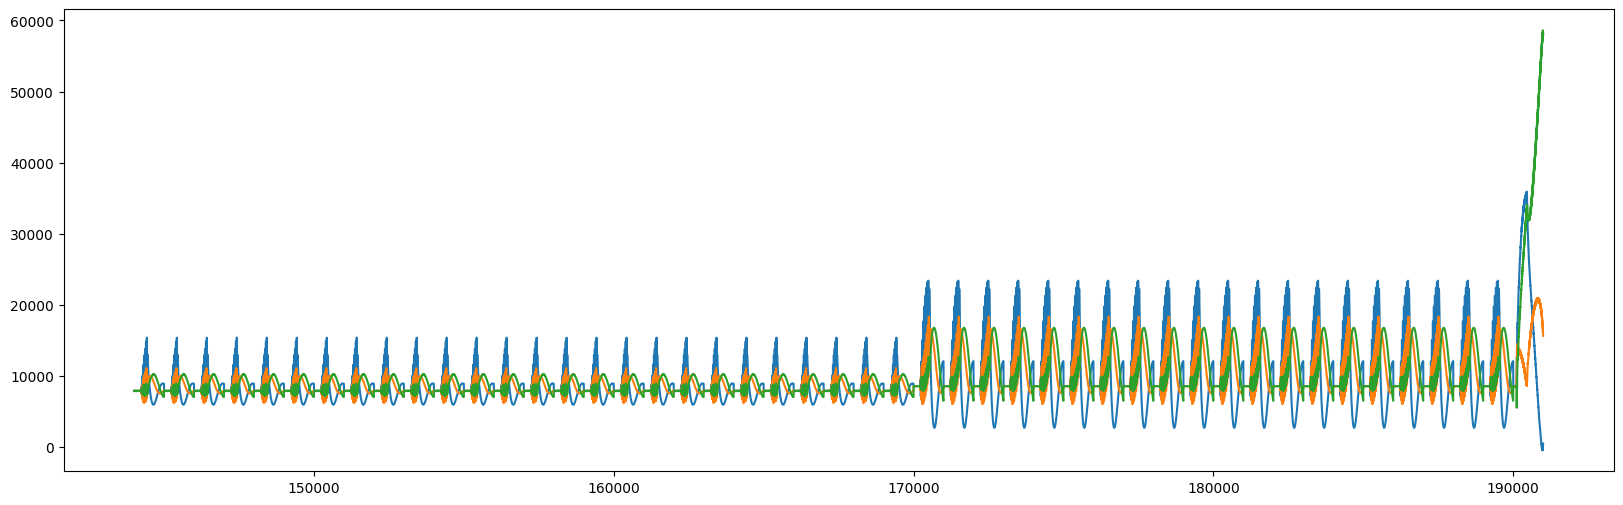

In [835]:
plt.figure(figsize=(20, 6))
plt.plot(predictors.iloc[144_000:, 0:3])

In [860]:
additions = predictors.iloc[190_000:191_000, ::]
all = [additions for i in range(8)]
nps = [[8] for i in range(9)]
additions.shape

(1000, 12)

In [861]:
nps

[[8], [8], [8], [8], [8], [8], [8], [8], [8]]

In [862]:
# ref = predictors.iloc[40_000:41_000, ::]
# ref.shape

In [863]:
for i in range(len(all)):
    additions = pd.concat((additions, all[i]), axis=0, ignore_index=True)
all[0].shape

(1000, 12)

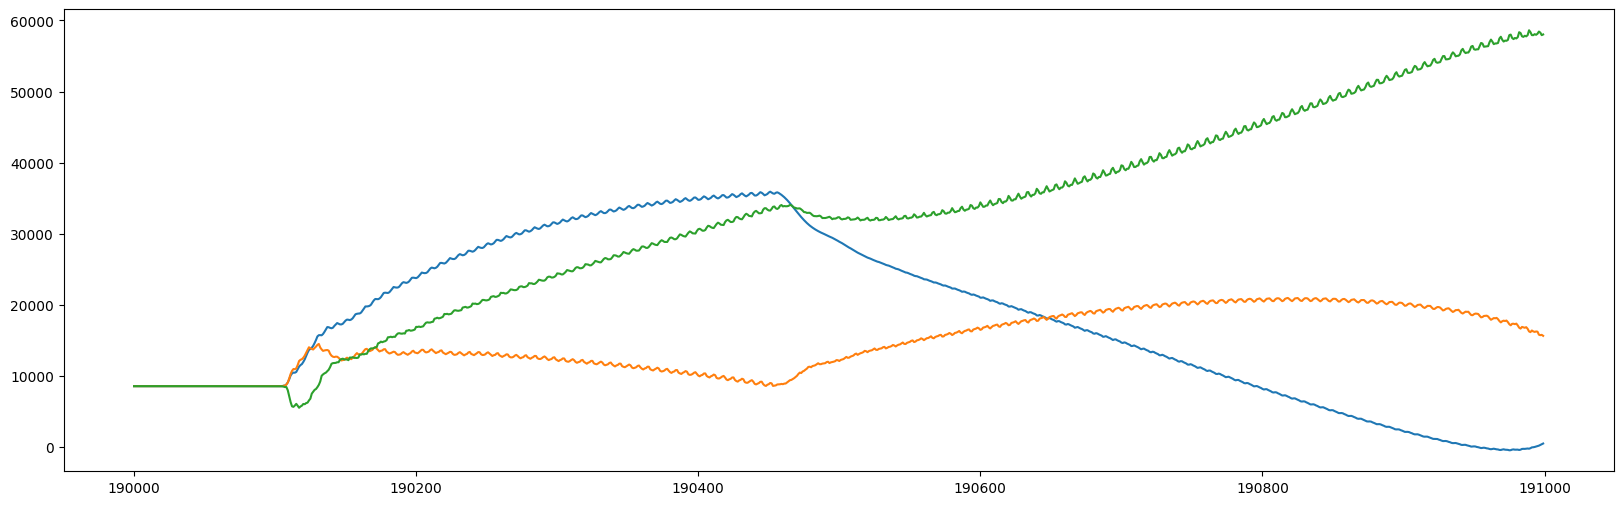

In [864]:
plt.figure(figsize=(20,6))
plt.plot(all[0].iloc[::, 0:3])

In [865]:
new_arr = np.array(nps)
new_np = np.append(targets, new_arr, axis=0)

In [866]:
new_np.shape

(200, 1)

In [867]:
additions.shape

(9000, 12)

In [868]:
predictors.shape

(191000, 12)

In [869]:
# PLOT OF WHAT I WOULD BE ADDING

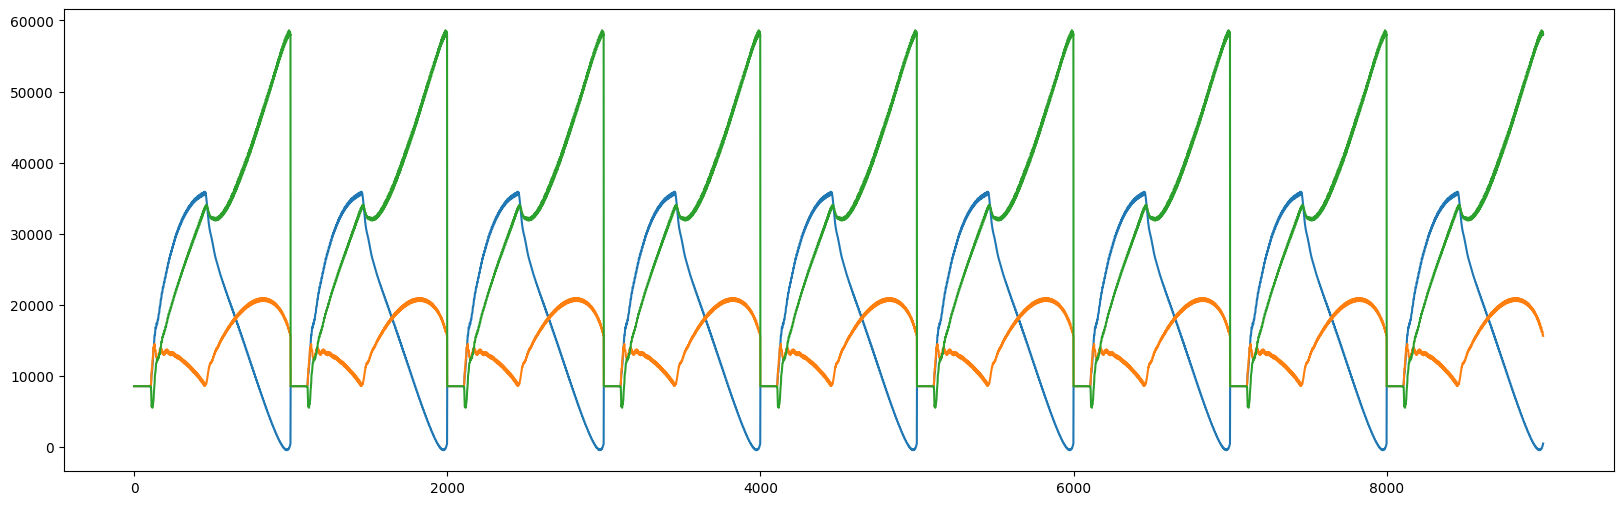

In [870]:
plt.figure(figsize=(20,6))
plt.plot(additions.iloc[::, 0:3])

In [871]:
predictors

,P1,P2,P3,Q1,Q2,Q3,V1,V2,V3,F1,F2,F3
0,8537.436205,8554.972708,8554.625895,306.711573,584.747359,1163.926565,310.206849,309.372742,307.635204,49.932061,49.931922,49.931924
1,8537.366616,8555.137957,8554.410231,306.754259,584.779678,1163.822821,310.206721,309.372645,307.635515,49.932062,49.931920,49.931926
2,8537.239596,8555.138446,8554.363441,306.935003,584.731852,1163.691579,310.206179,309.372788,307.635909,49.932063,49.931920,49.931927
3,8537.355190,8555.097488,8554.336897,307.039446,584.772307,1163.525362,310.205865,309.372667,307.636408,49.932062,49.931921,49.931927
4,8537.490515,8555.122597,8554.348352,307.072736,584.847604,1163.452432,310.205766,309.372441,307.636626,49.932061,49.931920,49.931927
...,...,...,...,...,...,...,...,...,...,...,...,...
190995,118.221826,16213.230485,58125.389908,45629.894468,62707.529973,-27819.275480,174.237300,123.004394,394.584810,49.999059,49.870979,49.537453
190996,178.976251,15788.715933,58435.941187,45562.255082,62841.817955,-27886.324994,174.440218,122.601530,394.785959,49.998576,49.874357,49.534982
190997,282.565485,15724.355541,58283.817035,45530.124032,62938.786960,-27903.459726,174.536612,122.310623,394.837363,49.997751,49.874870,49.536192
190998,393.451237,15768.873747,57930.644684,45394.580060,62924.951875,-27739.925177,174.943244,122.352128,394.346759,49.996869,49.874515,49.539003


In [872]:
preds = pd.concat((predictors, additions), axis=0, ignore_index=True)

In [873]:
# DESRIED SHAPE AT THE END OF THE DAY

In [874]:
preds.shape, new_np.shape

((200000, 12), (200, 1))

In [875]:
# DESIRED EXAMPLES AT THE END OF THE DAY

In [876]:
np.unique(new_np, return_counts=True)

(array([8]), array([200], dtype=int64))

In [877]:
joblib.dump(preds, 'fdia_df.joblib')
joblib.dump(new_np, 'fdia.joblib')

['fdia.joblib']

In [878]:
predictors = joblib.load('fdia_df.joblib')
targets = joblib.load('fdia.joblib')
predictors.shape, targets.shape

((200000, 12), (200, 1))

In [879]:
print(f'fdia attack event has a total of  {np.unique(targets, return_counts=True)[1][0]} examples')
# print(f'Imbalance total of {np.unique(targets, return_counts=True)[1][1]} examples')

fdia attack event has a total of  200 examples
